## STEP 1: Getting the list of all search pages

In [1]:
search_pages = ['https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs']
for i in range(20):
    strg = "https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs"+"-"+str(i+1)
    search_pages.append(strg)

In [2]:
search_pages

['https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-1',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-2',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-3',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-4',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-5',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-6',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-7',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-8',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-9',
 'https://www.naukri.com/data-scientist-data-analyst-machine-learning-python-r-jobs-10',
 'https://www.naukri.com/data-sci

## STEP 2: Getting list of all URLs

In [3]:
import urllib.request
import bs4 as bs
import re

In [4]:
hdr = {'User-Agent': 'Mozilla/5.0'}
cleaned_url_list = []
for page in search_pages:
    obj = urllib.request.Request(page, headers=hdr)
    sauce = urllib.request.urlopen(obj).read()
    soup = bs.BeautifulSoup(sauce, 'lxml')
    soup = str(soup)
    url_list = re.findall('count="\d*" href="\S+', soup)
    
    def cleanurl(strg):
        url = re.search('href=".+',strg).group()
        url = url.replace('href="','')
        url = url.replace('"','')
        return url
    
    for item in url_list:
        url = cleanurl(item)
        cleaned_url_list.append(url)

In [5]:
cleaned_url_list

['https://www.naukri.com/job-listings-Analyst-Data-Scientist-Machine-Learning-Artificial-Intelligence-Crescendo-Global-Services-Mumbai-1-to-4-years-020517000366?src=jobsearchDesk&amp;sid=14941887149557&amp;xp=1',
 'https://www.naukri.com/job-listings-Data-Scientist-Flex-Chennai-Pune-3-to-8-years-040517900366?src=jobsearchDesk&amp;sid=14941887149557&amp;xp=2',
 'https://www.naukri.com/job-listings-Manger-Pricing-data-Scientist-1-30-pm-11-pm-IST-Shift-Timings-Cvent-India-Pvt-Ltd-Delhi-NCR-Cyber-City-7-to-9-years-250317004499?src=jobsearchDesk&amp;sid=14941887149557&amp;xp=3',
 'https://www.naukri.com/job-listings-Engineering-Manager-Data-Scientist-Bangalore-Karnataka-Optum-a-UnitedHealth-Group-Company-Bengaluru-3-to-5-years-220417900497?src=jobsearchDesk&amp;sid=14941887149557&amp;xp=4',
 'https://www.naukri.com/job-listings-Analyst-Data-Scientist-Machine-Learning-artificial-Intelligence-Premium-Mumbai-1-to-4-years-260417000877?src=jobsearchDesk&amp;sid=14941887149557&amp;xp=5',
 'https:

## STEP 3: Extracting Keyskills from each URL and counting skills

In [6]:
def getkeyskills(webpage):
    x = urllib.request.Request(webpage, headers=hdr)
    srcode = urllib.request.urlopen(x).read()
    prse = bs.BeautifulSoup(srcode,'lxml')
    prse = str(prse)
    match = re.search("'JD_keyword':.+'", prse).group()
    match = match.replace("'JD_keyword': '","")
    match = match.replace("'","")
    keyskills = match.split(", ")
    keyskills = [element.lower() for element in keyskills]
    return keyskills

all_skills = {}

for itm in cleaned_url_list:
    try:
        kskills = getkeyskills(itm)
    except Exception:
        pass 
    for skill in kskills:
        if skill in all_skills:
            all_skills[skill] += 1
        else:
            all_skills[skill] = 1

In [7]:
import pandas as pd
table = pd.Series(all_skills)
ks = table.sort_values(ascending=False).head(50)
ks

machine learning               357
python                         344
r                              307
data analysis                  247
sql                            232
data mining                    159
sas                            145
data science                   135
data scientist                 124
java                           113
hadoop                         105
algorithms                      95
big data                        94
data analytics                  93
excel                           91
business analysis               84
analytics                       81
spark                           73
statistics                      66
nlp                             62
hive                            61
statistical analysis            59
statistical modeling            55
predictive modeling             54
data management                 53
matlab                          52
spss                            47
artificial intelligence         45
vba                 

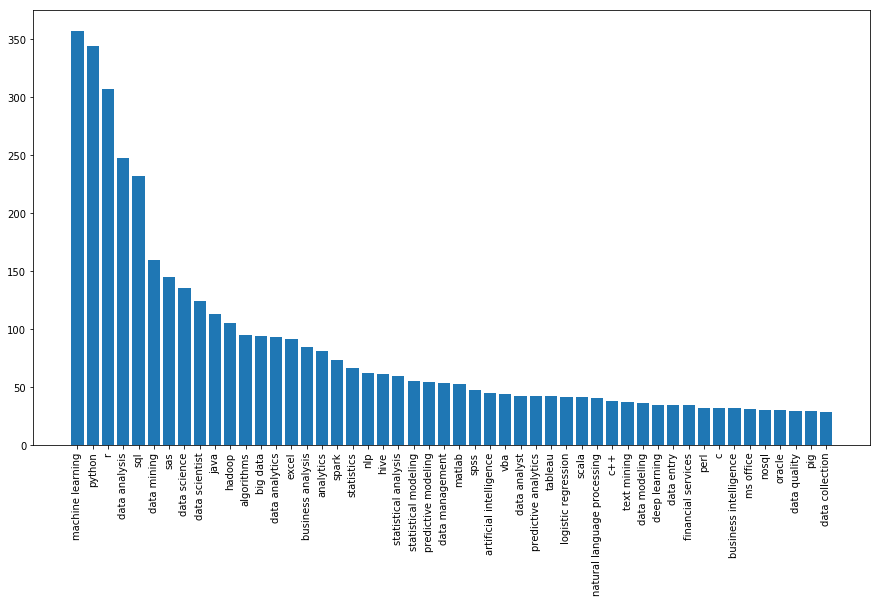

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(50),list(ks.values))
plt.xticks(np.arange(50), list(ks.index),rotation=90)
plt.show()